# Python Programming (Ch. 3)

This tutorial will serve as a gentle introduction to Python Programming.

* Script files
* Input/Output
* Structured Programming
* Nesting and Indentation
* Functions with Function Name Arguments

## Script files

a collection of Python statements. 

### A free-falling bungee jumper

We consider a free-falling bungee jumper as follows.

<img src="./figures/bungee.png" width="100" />

<sub><sub>(from Applied Numerical Methods with Python for Engineers and Scientists)</sub></sub>

The mathematical formulation is given as

$$ \frac{dv}{dt} = g - \frac{c_d}{m}v^2, $$

where
$v$ is downward vertical velocity,
$t$ is time, 
$g$ is the gravity acceleration,
$c_d$ is the drag coefficient,
$m$ is the jumper's mass. 

This is a mathematical model which describes the acceleration of a falling object to the forces on it. 

The exact solution is given as 

$$ v(t) = \sqrt{\frac{gm}{c_d}} \tanh (\sqrt{\frac{gm}{c_d}} t)$$


In [1]:
""" 
This is example 3.1. which computes the velocity of the free-falling bungee jumper.

"""

import math
g = 9.81 # [m/s] 
m = 68.1 # [kg] 
t = 12 # [sec]
cd = 0.25 # [kg/m]
v = math.sqrt(m*g/cd)*math.tanh(math.sqrt(m*g/cd)*t)
print('velocity =', v, 'm/s')

velocity = 51.69375204026111 m/s


### Python Functions

scripts that accept input arguments and return results.

```python
def function_name(arguments):
    """ docstring """
    statement
    return output
```

You can retrieve the docstring of the function_name as 

```python 
function_name.__doc__
```

In [3]:
# example 3.2
import math
import scipy.constants as pc

def freefall(t,m,cd):
    """ 
    This function computes bungee jumper velocity with 2nd-order drag.
    input arguments: 
        t: time 
        m: mass
        cd: drag coeffcient
    output:
        v: velocity
    """ 
    g = pc.g 
    return math.sqrt(m*g/cd)*math.tanh(math.sqrt(m*g/cd)*t)

freefall(12,68.1,0.25)


51.684924881439066

In [4]:
# different arguments
v = freefall(8,100,0.25)
print('velocity={0:g} m/s'.format(v))

velocity=62.6311 m/s


In [5]:
# see the docstring
print(freefall.__doc__)

 
    This function computes bungee jumper velocity with 2nd-order drag.
    input arguments: 
        t: time 
        m: mass
        cd: drag coeffcient
    output:
        v: velocity
    


In [11]:
# Python function can return more than one result.
import numpy as np 
def stats(x):
    n = len(x)
    avg = np.average(x)
    s = np.std(x)
    return n, avg, s 

y = [8,5,10,12,6,7,5,4]
z = stats(y)
print(z)
print(type(z)) 

_n, _avg, _s = stats(y)
print('n = ',_n)
print('avg = ',_avg)
print('s = ',_s)


(8, 7.125, 2.5708704751503917)
<class 'tuple'>
n =  8
avg =  7.125
s =  2.5708704751503917


In Python, variables are defined within a scope, which determines the variable's visibility and lifetime within the program. The scope of a variable guarantees its distinct identity and value within its specified context.

In [13]:
# local variable s cannt be seen from the general script!
# global variable x can be seen within the function.
def adder(a,b):
    print('x=',x)
    s = a + b 
    return s 
x = 88
c = 1 
d = 5
print('sum = ', adder(c,d))
print('s =', s)

x= 88
sum =  6


NameError: name 's' is not defined

In [16]:
import numpy as np 

def sgnsqr(x):
    x1 = x* abs(x)
    return x1 

def sgnsqrt(x):
    print('x1=',x1)
    x2 = np.sqrt(abs(x))* np.sign(x)
    return x2 

x = -2.0
print('x squared with sign = ', sgnsqr(x))
print('square root of x with sign = ', sgnsqrt(x))
print('x2=',x2)
    

x squared with sign =  -4.0


NameError: name 'x1' is not defined

In [17]:
import numpy as np 

def sgnsqr(x):
    x1 = x* abs(x)
    return x1 

def sgnsqrt(x):
    x2 = np.sqrt(abs(x))* np.sign(x)
    return x2 

x = -2.0
print('x squared with sign = ', sgnsqr(x))
print('square root of x with sign = ', sgnsqrt(x))
    

x squared with sign =  -4.0
square root of x with sign =  -1.4142135623730951


In [18]:
# we can change the scope of a variable in a function from local to global.

# local variable s cannt be seen from the general script!
# global variable x can be seen within the function.
def adder(a,b):
    global x 
    x = 88 
    s = a + b 
    return s 
c = 1 
d = 5
print('sum = ', adder(c,d))
print('x =', x)

sum =  6
x = 88


In [24]:
# We consider a function embedded within another function. 
# This is a nested function in Python.
# The inner function can access variables and parameters of the outer function,
# enhancing encapsulation and modularity in programming.

def fun1(x):
    b = -1
    d = 0.1
    def fun2(a,x):
        c = d*a*x**5
        return c 
    return fun2(b,x)

x = 2
print('fun1 result=', fun1(x))
 

fun1 result= -3.2


In [25]:
# fun2 cannot be invoked from outside the fun1 function.
print('fun2 result=', fun2(1,x))

NameError: name 'fun2' is not defined

## Input-Output

```python
>>> s = input('')
test
>>> print(s)
test
```

### KMA Weather Data Service 

<img src="./figures/aws.jpeg" width="300" />

* https://data.kma.go.kr/resources/html/en/aowdp.html
* AWS data at Goun-dong, Sejong-si

<img src="./figures/awsdata.png" width="300" />

```python
numpy.loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None, *, quotechar=None, like=None)
```

In [5]:
# read data file
# https://data.kma.go.kr/cmmn/static/staticPage.do?page=intro

import numpy as np 
_, t, temp = np.loadtxt('./data/awsdata.txt',skiprows=2,unpack=True)
print(t)
print(temp)


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23.]
[2.1 1.8 1.3 0.9 0.7 0.3 0.2 0.8 1.8 4.8 6.4 7.8 8.7 9.3 9.3 9.7 9.  8.1
 7.1 6.1 5.3 5.2 4.3]


In [8]:
# for google colab
t = np.squeeze(np.array(np.matrix('1.  2.  3.  4.  5.  6.  7.  8.  9. 10. \
            11. 12. 13. 14. 15. 16. 17. 18. 19. 20. \
                21. 22. 23.')))
print(t)
temp = np.squeeze(np.array(np.matrix('2.1 1.8 1.3 0.9 0.7 0.3 0.2 0.8 1.8 4.8 6.4 7.8 \
                 8.7 9.3 9.3 9.7 9.  8.1 7.1 6.1 5.3 5.2 4.3')))
print(temp)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23.]
[2.1 1.8 1.3 0.9 0.7 0.3 0.2 0.8 1.8 4.8 6.4 7.8 8.7 9.3 9.3 9.7 9.  8.1
 7.1 6.1 5.3 5.2 4.3]


Text(0, 0.5, 'Temperature [degC]')

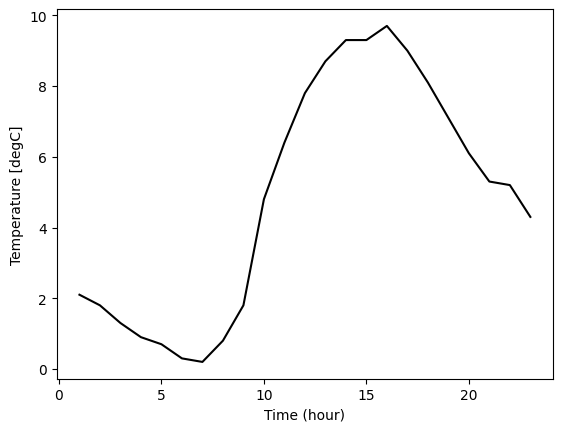

In [13]:
import matplotlib.pyplot as plt 

plt.plot(t,temp,'k')
plt.xlabel('Time (hour)')
plt.ylabel('Temperature [degC]')

In [9]:
# save data as numpy array 
print(type(t))
print(type(temp))

np.save('awsdata-t.npy',t)
np.save('awsdata-temp.npy',temp)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
# delete t and temp
del(t,temp)
print(t)
print(temp)

NameError: name 't' is not defined

In [11]:
# load awsdata 
t = np.load('awsdata-t.npy')
print(t)
temp = np.load('awsdata-temp.npy')
print(temp)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23.]
[2.1 1.8 1.3 0.9 0.7 0.3 0.2 0.8 1.8 4.8 6.4 7.8 8.7 9.3 9.3 9.7 9.  8.1
 7.1 6.1 5.3 5.2 4.3]


In [12]:
# Save several arrays into a single file in uncompressed .npz format. 
np.savez('awsdata.npz',t=t, temp=temp)

In [13]:
# access the data with keyword names
data = np.load('awsdata.npz')
print(data)
print(data['t'])
print(data['temp'])

NpzFile 'awsdata.npz' with keys: t, temp
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23.]
[2.1 1.8 1.3 0.9 0.7 0.3 0.2 0.8 1.8 4.8 6.4 7.8 8.7 9.3 9.3 9.7 9.  8.1
 7.1 6.1 5.3 5.2 4.3]


## Structured Programming

* if 
* if else 
* if elif else 
* for 
* while

```python
if condition: 
    statements
```


In [56]:
a = 5
b = 10
if a < b: 
    print('a is smaller than b')

a is smaller than b




```python
if condition: 
    statements
else:
    statements
```


In [59]:
a = 10
b = 5
if a <= b: 
    print('a is smaller than or equal to b')
else:
    print('a is larger than b')

a is larger than b


In [78]:
def tempconvert(t_in, units='degF'):
    if units == 'degF':
        return print('{0:5.2f} degC'.format((t_in-32)/1.8))
    else:
        return print('{0:5.2f} degF'.format(t_in*1.8+32))
    
tempconvert(98.6)
tempconvert(37,units='degC')

37.00 degC
98.60 degF




```python
if condition: 
    statements
elif condition: 
    statements    
else:
    statements
```


In [62]:
def compare_a_and_b(a,b):
    if a < b: 
        print('a is smaller than b')
    elif a == b:
        print('a is equal to b')
    else:
        print('a is larger than b')

compare_a_and_b(5,10)
compare_a_and_b(5,5)
compare_a_and_b(5,1)

a is smaller than b
a is equal to b
a is larger than b




```python
for item in iterableobj:
    statements
```


In [79]:
for icolor in ['red','blue','green','black']:
    print(icolor)

red
blue
green
black


In [80]:
for i in [1,2,3,4,5]:
    print(i)

1
2
3
4
5


In [81]:
for i in range(5):
    print(i)

0
1
2
3
4


In [83]:
for i in range(0,5,1):
    print(i)

0
1
2
3
4


In [84]:
for i in range(0,5,2):
    print(i)

0
2
4


In [96]:
# vectorization
import numpy as np 
y = np.zeros(10)
for i in range(10):
    print(i)
    t = i * 0.02
    # print(t)
    y[i] = np.cos(10*t)
print(y)

0
1
2
3
4
5
6
7
8
9
[ 1.          0.98006658  0.92106099  0.82533561  0.69670671  0.54030231
  0.36235775  0.16996714 -0.02919952 -0.22720209]


In [99]:
y = np.zeros(10)
t = np.arange(0,0.2, 0.02)
print(y)
print(t)
np.cos(10*t)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18]


array([ 1.        ,  0.98006658,  0.92106099,  0.82533561,  0.69670671,
        0.54030231,  0.36235775,  0.16996714, -0.02919952, -0.22720209])



```python
while condition:
    statements
```

In [101]:
cnt = 10 
while cnt > 0:
    cnt = cnt - 1
    print(cnt)

9
8
7
6
5
4
3
2
1
0


In [104]:
# break
cnt = 10 
while True:
    cnt = cnt - 1
    if cnt < 5: break
    print(cnt)

9
8
7
6
5


## Nesting and Indentation







```python
if condition1: 
    if condition2: 
        statements
    else:
        statements
else:
    if condition3: 
        statements
    else:
        statements
```


## Python Functions with Function Name Arguments



In [108]:
# lambda function creates a simple function 
f1 = lambda x,y: x**2 + y**2

f1(3,4)

25

In [114]:
# lambda function can include global variables
a = 3
b = 5 
f2 = lambda x: a**x + b

f2(2)

14

In [115]:
# return a function 
def new_function(a,b):
    def f2(x):
        return a**x + b
    return f2 
f2 = new_function(a,b)
f2(2)

14

In [117]:
# USE partial! 
from functools import partial

function = lambda a,b,x: a**x + b
f2 = partial(function,3,5)

f2(2)


14

In [112]:
# a function can take another function as an argument
def f_at_midpoint(f,x1,x2):
    xmid = (x1 + x2)/2
    return f(xmid)

fmid = f_at_midpoint(np.cos, 0,10)
print(fmid)

0.28366218546322625
